In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Define file path
path = r"C:\Users\khush\OneDrive\Documents\Insider-trading\insider-trading-signal\ETL\final_data_2025Q1.parquet"
# Load the data using the fastparquet engine
df = pd.read_parquet(path, engine="fastparquet")
df.head(20)

,side,log_dollar_value,role,is_10b5_1,log_size_vs_cap,label_up_market
3,sell,15.441086,OFFICER,0,-9.087956,1
4,sell,14.496378,DIRECTOR,0,-10.032665,1
5,buy,13.401964,OFFICER,0,-9.559271,1
6,sell,14.673079,OFFICER,1,-10.128313,0
7,sell,11.586464,DIRECTOR,1,-13.214937,0
8,sell,15.554449,OFFICER,1,-9.246943,0
9,sell,13.269491,OFFICER,0,-10.009910,0
10,sell,15.226362,OFFICER,0,-8.053038,0
11,sell,13.603320,DIRECTOR,0,-9.676081,0
19,sell,11.336200,OFFICER,0,-11.597717,1


In [3]:
# drop_first=True helps avoid multicollinearity (e.g., if it's not "Buy", it must be "Sell")
df_encoded = pd.get_dummies(df, columns=['side', 'role'], drop_first=True)

# Define Features and Target

In [4]:
# The target is what we want to predict: 'label_up_market' (Will the stock go up?)
target_col = 'label_up_market'
# X contains all the features used to make the prediction
X = df_encoded.drop(columns=[target_col])
# y contains the actual outcomes (Up Market: 1 or 0)
y = df_encoded[target_col]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Model

In [6]:
# Configure the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,       # Limit depth to prevent overfitting noise
    min_samples_leaf=5, # Each leaf must have at least 5 trades
    random_state=42,
    n_jobs=-1
)

In [7]:
print("Training Random Forest...")
# Fit the model to the training data
rf_model.fit(X_train, y_train)

Training Random Forest...


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [8]:
# Predict outcomes for the test set
y_pred = rf_model.predict(X_test)

# Evaluation

In [9]:
print("--- Random Forest Performance ---")
# Print the accuracy score (percentage of correct guesses)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
# Show detailed metrics: Precision (accuracy of positive predictions), Recall (ability to find positives), F1-Score
print(classification_report(y_test, y_pred))

--- Random Forest Performance ---
Accuracy: 0.6084

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       708
           1       0.53      0.27      0.36       477

    accuracy                           0.61      1185
   macro avg       0.58      0.55      0.54      1185
weighted avg       0.59      0.61      0.57      1185



# Calculate Feature Importance

In [10]:
# Sort them in ascending order for plotting
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

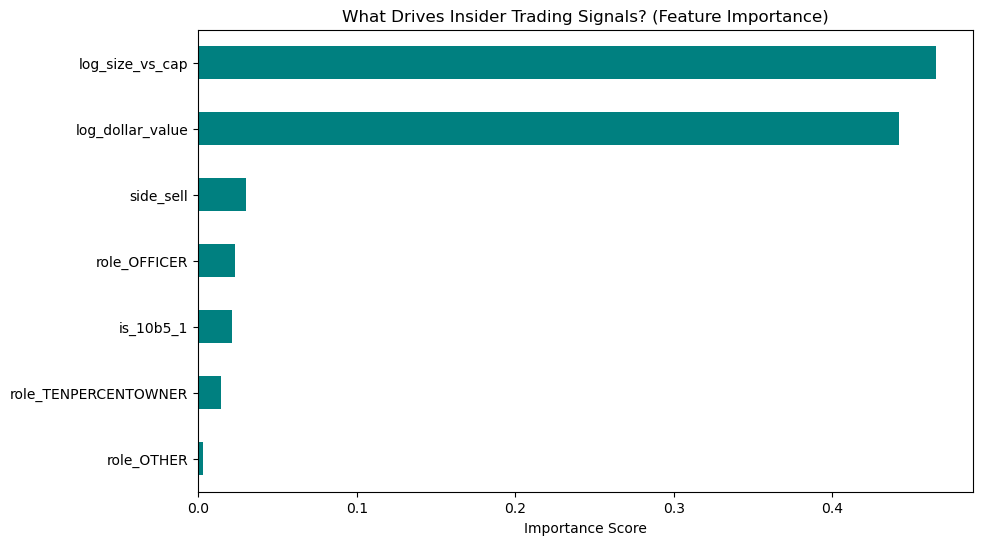

In [11]:
# Plot a horizontal bar chart of feature importance
plt.figure(figsize=(10, 6))
importance.plot(kind='barh', color='teal')
plt.title("What Drives Insider Trading Signals? (Feature Importance)")
plt.xlabel("Importance Score")
plt.show()